In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from scipy import stats
from datetime import datetime, timedelta
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

**The main data table was chosen as "bank-additional-full" because the number of features(columns) are more in this file. It was thought that a more truthfull and more succesfull result would be obtained in machine learning with data containing more columns or features.**

In [ ]:
df2 = pd.read_csv("bank-additional-full.csv",sep=';')
df3 = pd.read_csv("bank-additional-full.csv",sep=';')
df2.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [ ]:
df2.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [ ]:
str_cols = [x for x in df2.columns if type(df2[x].loc[df2[x].first_valid_index()])==str]

for columns in str_cols:
  print(columns)
  print(len(df2[df2[columns].str.contains('unknown')]))


job
330
marital
80
education
1731
default
8597
housing
990
loan
990
contact
0
month
0
day_of_week
0
poutcome
0
y
0


**When object typed columns are checked, the “unknown” string is searched, the number of NA, “unknown” rows from 41188 rows in total in each column are stated with their column names above.**

In [ ]:
df2['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [ ]:
df2['job'] = df2['job'].replace(['unknown'],np.nan)

**When the “job” column is handled, “unknown” is found in 273 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [ ]:
df2['marital'] = df2['marital'].replace(['unknown'],np.nan)

**When the “marital” column is handled, “unknown” is found in 60 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

**When the “education” column is handled, “unknown” is found in 1442 rows, as it is pointed with a red rectangle on the left. So, it is planned to be handled as a different class since it has a significant number of members.**

In [ ]:
df2['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [ ]:
df2['default'] = df2['default'].replace(['yes'],np.nan)


**When the “default” column is handled, “unknown” is found in 7366 rows, as it is pointed with a red rectangle on the left. So, it is planned to be handled as a another category while it is decided that "yes" should be deleted from that since it has just 2 rows.**

In [ ]:
df2['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [ ]:
df2['housing'] = df2['housing'].replace(['unknown'],np.nan)

**When the “housing” column is handled, “unknown” is found in 849 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**


In [ ]:
df2['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [ ]:
df2['loan'] = df2['loan'].replace(['unknown'],"no")


 **When the “loan” column is handled, “unknown” is found in 849 rows, as it is pointed with a red rectangle on the left. So, it is planned to be removed from the data because it is seen as an insignificant amount.**

In [ ]:
df2=df2.dropna()

In [ ]:
df2.shape

(39800, 21)

**At the beginning, data had 41188 rows. With outlier deletion process and process of "unknown" values 34003 rows remained.**

# **Machine Learning Models**

## Encoding Categorical values

In [ ]:
features = [col for col in df2.columns if col != "y"]
len(features)

20

In [ ]:
cat_cols = ['job',
            'marital',
            'education',
            'default',
            'housing',
            'loan',
            'contact',
            'month',
            'day_of_week',
            'poutcome']
num_cols = [col for col in features if col not in cat_cols]

In [ ]:
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [ ]:
# check categorical features' unique values

for column in cat_cols:
    print(column, ":", df2[column].unique())

job : ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'entrepreneur' 'student']
marital : ['married' 'single' 'divorced']
education : ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default : ['no' 'unknown']
housing : ['no' 'yes']
loan : ['no' 'yes']
contact : ['telephone' 'cellular']
month : ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week : ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome : ['nonexistent' 'failure' 'success']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
# creating one hot encoder object 
onehotencoder = OneHotEncoder()

In [ ]:
one_hot_encoded_data = pd.get_dummies(df2, columns = cat_cols)
one_hot_encoded_data2 = pd.get_dummies(df3, columns = cat_cols)

In [ ]:
one_hot_encoded_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,...,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,...,0,0,1,0,0,0,0,0,1,0


## Encoding Target value "y"

In [ ]:
one_hot_encoded_data["y"].replace({"yes":1,"no":0},inplace=True)
one_hot_encoded_data2["y"].replace({"yes":1,"no":0},inplace=True)

In [ ]:
one_hot_encoded_data["y"]

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 39800, dtype: int64

## Train-Test Split

In [ ]:
one_hot_encoded_data.drop('duration', axis=1, inplace=True)
one_hot_encoded_data2.drop('duration', axis=1, inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(one_hot_encoded_data, train_size = 0.8, random_state = 42)
df_train.shape, df_test.shape

((31840, 58), (7960, 58))

In [ ]:
y_train = df_train.pop('y')
X_train = df_train

y_test = df_test.pop('y')
X_test = df_test

## Model testing Linear-Non Linear Algorithms

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

### Tuning for Linear Discriminant Analysis

In [ ]:
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
search = GridSearchCV(LinearDiscriminantAnalysis(), grid, scoring='roc_auc', cv=kfold, n_jobs=-1)
results = search.fit(X_train, y_train)
print('Best Score: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 603, in fit
    covariance_estimator=self.covariance_estimator,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/discriminant_analysis.py", line 440, in _solve_eigen
    evals, evecs = linalg.eigh(Sb, Sw)
  File "/usr/local/li

Best Score: 0.789
Config: {'solver': 'svd'}


### Tuning for K Neighbors Classifier

In [ ]:
x = one_hot_encoded_data.drop(columns=['y'])
y = one_hot_encoded_data['y']
#List Hyperparameters that we want to tune.
leaf_size = list(range(1,10))
n_neighbors = list(range(1,10))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch

kfold = KFold(n_splits=10,shuffle=True, random_state=42)
clf = GridSearchCV(knn_2, hyperparameters,  cv=kfold,scoring='roc_auc')
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

### Tuning for Decision Tree Classifier

In [ ]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}
# Instantiate the grid search model
grid_search = GridSearchCV(DecisionTreeClassifier(), 
                           param_grid=params, 
                           cv=kfold, n_jobs=-1, verbose=1, scoring = "roc_auc")
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

### Tuning for Naive Bayes

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=kfold, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
GaussianNB(var_smoothing=5.3366992312063123e-05)


### Testing Tuned models

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10,shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.782763 (0.013525)
LDA: 0.781705 (0.015938)
KNN: 0.730053 (0.020025)
CART: 0.621600 (0.008858)
NB: 0.762728 (0.017378)


In [ ]:
models = []
#models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=3000)))
#models.append(('LDA', LinearDiscriminantAnalysis(solver="svd")))
#models.append(('KNN', KNeighborsClassifier()))
#models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB(var_smoothing=5.3366992312063123e-05)))

In [ ]:
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10,shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='roc_auc')
    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.771508 (0.012909)


## Model testing Ensemble Methods

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

In [ ]:
# ensemble models
models = []
models.append(('AB', AdaBoostClassifier()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('ET', ExtraTreesClassifier()))
models.append(('XGB', XGBClassifier()))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.795832 (0.014530)
GBM: 0.800623 (0.013105)
RF: 0.776719 (0.014890)
ET: 0.749577 (0.014473)
XGB: 0.803317 (0.013301)


### Tuning for Ada Boost

>0.100 0.786 (0.013)
>0.200 0.790 (0.014)
>0.300 0.792 (0.014)
>0.400 0.794 (0.014)
>0.500 0.795 (0.014)
>0.600 0.796 (0.014)
>0.700 0.796 (0.015)
>0.800 0.796 (0.015)
>0.900 0.796 (0.014)
>1.000 0.796 (0.015)
>1.100 0.797 (0.014)
>1.200 0.799 (0.015)
>1.300 0.799 (0.015)
>1.400 0.797 (0.014)
>1.500 0.799 (0.014)
>1.600 0.798 (0.014)
>1.700 0.797 (0.014)
>1.800 0.797 (0.008)
>1.900 0.791 (0.015)
>2.000 0.504 (0.203)


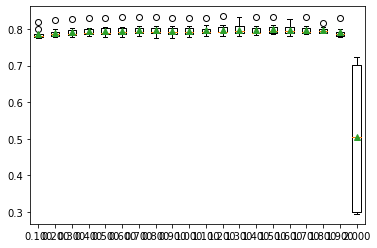

In [ ]:
from numpy import mean
from numpy import std
from numpy import arange
from matplotlib import pyplot

# get a list of models to evaluate
def get_models():
	models = dict()
	# explore learning rates from 0.1 to 2 in 0.1 increments
	for i in arange(0.1, 2.1, 0.1):
		key = '%.3f' % i
		models[key] = AdaBoostClassifier(learning_rate=i)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	# evaluate the model and collect the results
	scores = cross_val_score(model,X, y, scoring='roc_auc', cv=kfold, n_jobs=-1)
	return scores

# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model,X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

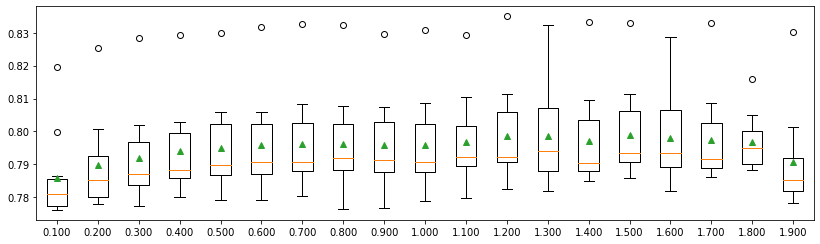

In [ ]:
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results[:19], labels=names[:19], showmeans=True)
plt.show()

In [ ]:
def get_models():
	models = dict()
	# define number of trees to consider
	n_trees = [10, 50, 100, 500]
	for n in n_trees:
		models[str(n)] = AdaBoostClassifier(n_estimators=n)
	return models

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results, labels=names, showmeans=True)
plt.show()

>10 0.787 (0.013)
>50 0.796 (0.015)
>100 0.798 (0.015)
>500 0.802 (0.015)
>1000 0.802 (0.015)


KeyboardInterrupt: ignored

>1 0.796 (0.015)
>2 0.798 (0.011)
>3 0.777 (0.011)
>4 0.741 (0.014)
>5 0.707 (0.012)
>6 0.660 (0.016)
>7 0.648 (0.020)
>8 0.660 (0.013)
>9 0.691 (0.022)
>10 0.702 (0.016)


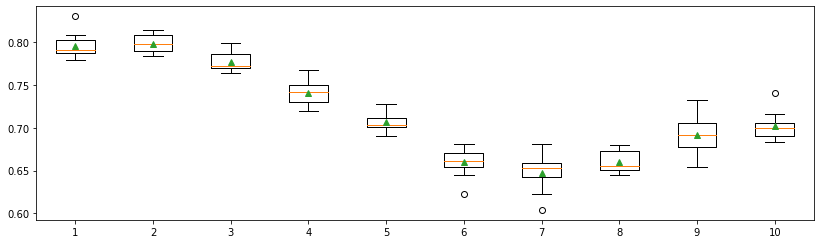

In [ ]:
def get_models():
	models = dict()
	# explore depths from 1 to 10
	for i in range(1,11):
		# define base model
		base = DecisionTreeClassifier(max_depth=i)
		# define ensemble model
		models[str(i)] = AdaBoostClassifier(base_estimator=base)
	return models

models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	# evaluate the model
	scores = evaluate_model(model, X_train, y_train)
	# store the results
	results.append(scores)
	names.append(name)
	# summarize the performance along the way
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.rcParams["figure.figsize"] = [11.50, 3.50]
plt.rcParams["figure.autolayout"] = True

ax=plt.boxplot(results, labels=names, showmeans=True)
plt.show()

In [ ]:
# trying ada boost hyperparameters
models = []
models.append(('AB', AdaBoostClassifier()))
base = DecisionTreeClassifier(max_depth=2)
models.append(('AB with hyperparameters', AdaBoostClassifier(base_estimator=base,n_estimators=500,learning_rate=1.3)))

results = []
names = []
kfold = KFold(n_splits=10,shuffle=True, random_state=42)
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

AB: 0.792802 (0.012229)
AB with hyperparameters: 0.751718 (0.014429)


Since hypermarameters were investigated seperately their affect on the result is much different while other parameters take place as well. So, lets try them while they are together with GridSearch.

In [ ]:
params = {
     'n_estimators': np.arange(10,300,10),
     'learning_rate': [0.01, 0.05, 0.1, 1,1.5],
 }
# Instantiate the grid search model
grid_search = GridSearchCV(AdaBoostClassifier(), 
                           param_grid=params, 
                           cv=kfold, n_jobs=-1, verbose=1, scoring = "roc_auc")
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

### Tuning for XG Boost

In [ ]:
# ensemble models
models = []
models.append(('XGB', XGBClassifier(learning_rate =0.02,
 n_estimators=250,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=1,
 colsample_bytree=1,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 seed=27)))

results = []
names = []
for name, model in models:
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring="roc_auc")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

XGB: 0.800024 (0.011699)
